In [1]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    data = pd.DataFrame(json.load(data_file))
    
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [6]:
logins.isnull().sum()

login_time    0
dtype: int64

In [7]:
len(data)

50000

In [8]:
avg_by_driver = np.mean(data['avg_rating_by_driver'])
avg_by_driver

4.778158195947439

In [9]:
data['avg_rating_by_driver']= data['avg_rating_by_driver'].fillna(int(avg_by_driver))
print(data.isnull().sum())

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [10]:
avg_of_driver = np.mean(data['avg_rating_by_driver'])
avg_of_driver

4.77502999999973

In [11]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(int(avg_of_driver))
print(data.isnull().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64


In [12]:
data['phone'] = data['phone'].fillna('Other')
print(data.isnull().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [13]:
sorted_cities = data['city'].sort_values()
sorted_cities.head()

49999    Astapor
13706    Astapor
13705    Astapor
33004    Astapor
33009    Astapor
Name: city, dtype: object

In [14]:
cities_counted = sorted_cities.value_counts()
cities_counted = cities_counted.rename_axis("city").reset_index(name = "count")

<BarContainer object of 3 artists>

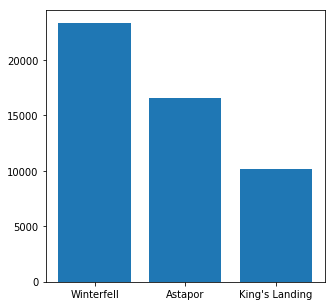

In [15]:
x = list(cities_counted['city'])
y = list(cities_counted['count'])

plt.figure(figsize = (5,5))
plt.bar(x,y)

In [16]:
#Aggregate login counts based on 15-minute time intervals
#logins.groupby(pd.TimeGrouper(freq = '15Min'))
#logins['login_count'] = 1
#logins = logins.set_index(pd.to_datetime(logins['login_time'], unit='s'))[['logins_count']]

print(type(logins['login_time']))

<class 'pandas.core.series.Series'>


In [17]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [18]:
logins.index = pd.to_datetime(logins.index, unit='s')

In [19]:
logins['index'] = logins['login_time']
logins['count'] = 1
#logins = logins.drop('login_time')

In [20]:
#logins_15 = pd.DataFrame(logins.count.resample('15Min').sum())
logins_15 = pd.DataFrame(logins['count'].resample('15Min').sum())

In [21]:
logins_15.head()

,count
1970-01-01 00:00:00,900
1970-01-01 00:15:00,900
1970-01-01 00:30:00,900
1970-01-01 00:45:00,900
1970-01-01 01:00:00,900


In [22]:
#what variable you want to predict and build something around that

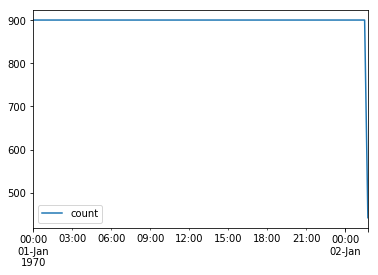

In [30]:
logins_15.plot(kind = "line")

In [24]:
#A/B test